In [1]:
%load_ext autoreload

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## for our scripts:
# %aimport hmm
%autoreload 2
import hmm
## for plotting
%matplotlib inline

In [3]:
data_dir = os.path.join('.','data')

ref = pd.read_excel(os.path.join(data_dir, 'GroundTruths.xlsx'), 
                    names=['file', 'date_time'])
ref.date_time = pd.to_datetime(ref.date_time)

# df = pd.read_csv(os.path.join(data_dir, 'data_6302.csv'), index_col=0)

In [4]:
if not os.path.isfile(os.path.join(data_dir, 'completeDB.h5')):
    print('reading in...')
    df = pd.concat([pd.read_csv(os.path.join(data_dir, 'data_6302.csv'), 
                                 index_col=0, parse_dates=True),
                    pd.read_csv(os.path.join(data_dir, 'data_7600.csv'), 
                                 index_col=0, parse_dates=True),
                    pd.read_csv(os.path.join(data_dir, 'data_7664.csv'), 
                                 index_col=0, parse_dates=True)])
    print('creating h5...')
    df.to_hdf(os.path.join(data_dir, 'completeDB.h5'))
    print('done!')
else:
    print('reading h5...')
    df = pd.read_hdf(os.path.join(data_dir, 'completeDB.h5'))
    print('done!')

reading h5...
done!


In [85]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
df_n = scale.fit_transform(df.loc[:,'T_1':'T_27'].values)
df_n = pd.DataFrame(data=df_n, index=df.index, columns=df.loc[:,'T_1':'T_27'].columns)

# dfo = df_n[df_n.abs()<3]
# dfo.index = pd.to_datetime(dfo.index)
compress_window = '3h'
dfr = df_n.resample(compress_window).median()
dfr = dfr[dfr.abs()<3]

dfr = dfr.dropna()

In [144]:


target = pd.Series(index=df_n.index, data=0)
target[np.isin(df_n.index,ref.date_time)] = 1

# dfr = dfo.resample(compress_window).mean()
target = target.resample(compress_window).max()
target = target[dfr.index]

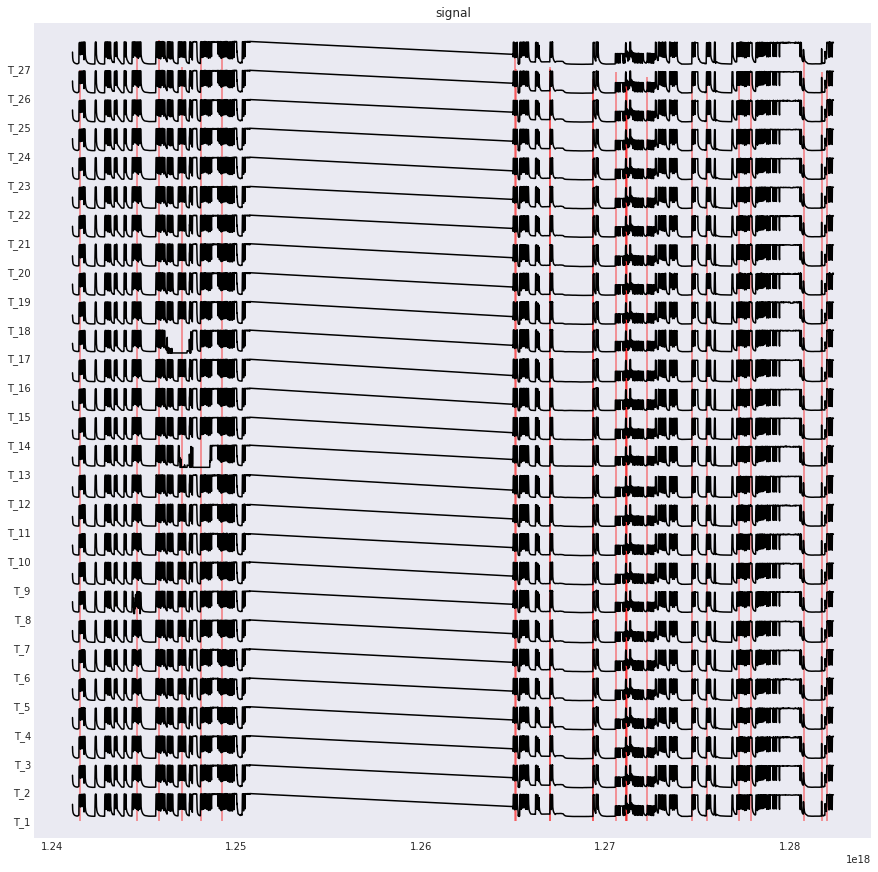

In [87]:
with sns.axes_style('dark'):
    plt.figure(figsize=(15,15))
    
#     for i, (name, sig) in enumerate(dfr.loc[:,'T_1':].iteritems()):
#         plt.plot(dfr.loc[:,'T_1':].mean(axis=1) - sig+0.1*i, 'k')
#     plt.vlines(ref[ref.file==6302].date_time.values, 0, 2.6, color='r', alpha=.5)
#     plt.title('signal deviation from mean')
#     plt.yticks(np.arange(0,2.8, .1),dfr.loc[:,'T_1':].columns )
    
    for i, (name, sig) in enumerate(dfr.iteritems()):
        plt.plot(sig+dfr.max().max()*i, 'k')
    plt.vlines(ref.date_time.values, 0, 27*dfr.max(), color='r', alpha=.5)
    plt.title('signal')
    plt.yticks(np.arange(0,27*dfr.max().max(), dfr.max().max()),dfr.columns )
    plt.ylim(-.1, 27*dfr.max().max()+.1)

In [102]:
mod = hmm.RollingHMM(dfr.T_3, 3, target, anomaly_window='6h')

In [103]:
mod.fit()

Parsing sub-sequences...
Parsed 2484 state sequences...
removed 2484 NaN sequences...
Using 2460 Non-anomalous sequences;
 Training HMM...
[1] Improvement: 1024.2678021715956	Time (s): 0.02801
[2] Improvement: 78.41006875214407	Time (s): 0.02645
[3] Improvement: 38.3464261792833	Time (s): 0.02383
[4] Improvement: 23.25686574570318	Time (s): 0.0221
[5] Improvement: 15.762438086061593	Time (s): 0.02566
[6] Improvement: 11.681973779763211	Time (s): 0.02549
[7] Improvement: 8.483450067374179	Time (s): 0.02296
[8] Improvement: 7.247805696419164	Time (s): 0.02111
[9] Improvement: 7.8539955606402145	Time (s): 0.02427
[10] Improvement: 9.780155316017954	Time (s): 0.0232
[11] Improvement: 10.552480089300843	Time (s): 0.0247
[12] Improvement: 8.156812662871744	Time (s): 0.02273
[13] Improvement: 5.147295860205304	Time (s): 0.02354
[14] Improvement: 2.9039338638385743	Time (s): 0.02942
[15] Improvement: 1.518833869215996	Time (s): 0.02533
[16] Improvement: 0.796815097709441	Time (s): 0.02253
[17]

[148] Improvement: 1.808637534850277e-06	Time (s): 0.03249
[149] Improvement: 1.7645334082772024e-06	Time (s): 0.02834
[150] Improvement: 1.7216589185409248e-06	Time (s): 0.0279
[151] Improvement: 1.6799695004010573e-06	Time (s): 0.03543
[152] Improvement: 1.6394224076066166e-06	Time (s): 0.03038
[153] Improvement: 1.5999839888536371e-06	Time (s): 0.02962
[154] Improvement: 1.5616205928381532e-06	Time (s): 0.02616
[155] Improvement: 1.5242894733091816e-06	Time (s): 0.03054
[156] Improvement: 1.4879642549203709e-06	Time (s): 0.03202
[157] Improvement: 1.4526203813147731e-06	Time (s): 0.0308
[158] Improvement: 1.418206920789089e-06	Time (s): 0.02481
[159] Improvement: 1.3847129594068974e-06	Time (s): 0.02673
[160] Improvement: 1.3521021173801273e-06	Time (s): 0.02204
[161] Improvement: 1.3203480193624273e-06	Time (s): 0.02428
[162] Improvement: 1.2894179235445336e-06	Time (s): 0.02522
[163] Improvement: 1.2593063729582354e-06	Time (s): 0.02571
[164] Improvement: 1.2299697118578479e-06	Ti

[292] Improvement: 7.673224899917841e-08	Time (s): 0.02707
[293] Improvement: 7.514518074458465e-08	Time (s): 0.03168
[294] Improvement: 7.358721632044762e-08	Time (s): 0.02526
[295] Improvement: 7.207472663139924e-08	Time (s): 0.02863
[296] Improvement: 7.058042683638632e-08	Time (s): 0.02661
[297] Improvement: 6.9119778345339e-08	Time (s): 0.02915
[298] Improvement: 6.770096661057323e-08	Time (s): 0.02402
[299] Improvement: 6.629488780163229e-08	Time (s): 0.02517
[300] Improvement: 6.493064574897289e-08	Time (s): 0.02595
[301] Improvement: 6.358823156915605e-08	Time (s): 0.02716
[302] Improvement: 6.227764970390126e-08	Time (s): 0.0286
[303] Improvement: 6.098707672208548e-08	Time (s): 0.02882
[304] Improvement: 5.973288352834061e-08	Time (s): 0.0249
[305] Improvement: 5.84968802286312e-08	Time (s): 0.02764
[306] Improvement: 5.7299985201098025e-08	Time (s): 0.02483
[307] Improvement: 5.610672815237194e-08	Time (s): 0.02561
[308] Improvement: 5.495621735462919e-08	Time (s): 0.02549
[

[433] Improvement: 4.105459083802998e-09	Time (s): 0.02824
[434] Improvement: 4.0236045606434345e-09	Time (s): 0.03056
[435] Improvement: 3.942659532185644e-09	Time (s): 0.0293
[436] Improvement: 3.862623998429626e-09	Time (s): 0.02909
[437] Improvement: 3.780769475270063e-09	Time (s): 0.02945
[438] Improvement: 3.702552930917591e-09	Time (s): 0.02887
[439] Improvement: 3.6288838600739837e-09	Time (s): 0.02619
[440] Improvement: 3.5533957998268306e-09	Time (s): 0.0278
[441] Improvement: 3.4806362236849964e-09	Time (s): 0.02854
[442] Improvement: 3.408786142244935e-09	Time (s): 0.02832
[443] Improvement: 3.3405740396119654e-09	Time (s): 0.02663
[444] Improvement: 3.268723958171904e-09	Time (s): 0.0272
[445] Improvement: 3.205968823749572e-09	Time (s): 0.02518
[446] Improvement: 3.1395757105201483e-09	Time (s): 0.0255
[447] Improvement: 3.0704541131854057e-09	Time (s): 0.02841
[448] Improvement: 3.016793925780803e-09	Time (s): 0.02931
[449] Improvement: 2.9440343496389687e-09	Time (s): 0

{
    "class" : "HiddenMarkovModel",
    "name" : "None",
    "start" : {
        "class" : "State",
        "distribution" : null,
        "name" : "None-start",
        "weight" : 1.0
    },
    "end" : {
        "class" : "State",
        "distribution" : null,
        "name" : "None-end",
        "weight" : 1.0
    },
    "states" : [
        {
            "class" : "State",
            "distribution" : {
                "class" : "Distribution",
                "name" : "NormalDistribution",
                "parameters" : [
                    0.15641619105359975,
                    0.003288193164602073
                ],
                "frozen" : false
            },
            "name" : "s0",
            "weight" : 1.0
        },
        {
            "class" : "State",
            "distribution" : {
                "class" : "Distribution",
                "name" : "NormalDistribution",
                "parameters" : [
                    0.031430875208923396,
               

In [104]:
lprob = mod.like()

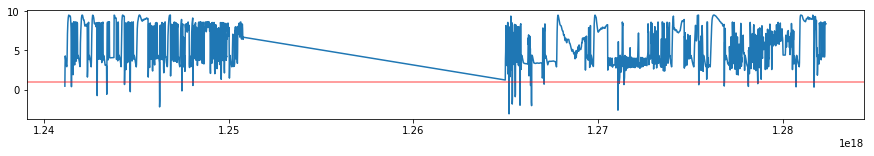

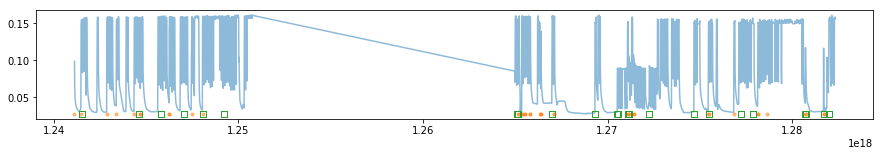

In [105]:
# lprob.plot()
# plt.vlines(ref[ref.file==6302].date_time.values, -10, 10, color='r', alpha=.5)
window_target = mod.target.rolling(mod.window).apply(np.max)

thres=1

plt.figure(figsize=(15,2))
plt.plot(lprob)
plt.axhline(thres, color='r', alpha=.5)

plt.figure(figsize=(15,2))
plt.plot(mod.s, alpha=.5)

plt.plot((mod.s.min()*mod.s/mod.s)[lprob<thres], '.', alpha=.5)
plt.plot(mod.s.min()*window_target[window_target==1], 's', markerfacecolor='none')
# plt.plot(mod.s[window_target==1], 's', markerfacecolor='none')

# dprob = pd.Series(np.gradient(lprob), index=lprob.index)
# plt.plot(dprob.iloc[10:])
# pd.to_datetime(ref[ref.file==6302].date_time)

In [106]:
experiment = {}

from tqdm import tqdm_notebook

for sensor, signal in tqdm_notebook(dfr.items()):
    experiment[sensor] = hmm.RollingHMM(signal, 3, target, anomaly_window='6h')
    experiment[sensor].fit(verbose=False)
    

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

Parsing sub-sequences...
Parsed 2484 state sequences...
removed 2484 NaN sequences...
Using 2460 Non-anomalous sequences;
 Training HMM...
Done!
Parsing sub-sequences...
Parsed 2484 state sequences...
removed 2484 NaN sequences...
Using 2460 Non-anomalous sequences;
 Training HMM...
Done!
Parsing sub-sequences...
Parsed 2484 state sequences...
removed 2484 NaN sequences...
Using 2460 Non-anomalous sequences;
 Training HMM...
Done!
Parsing sub-sequences...
Parsed 2484 state sequences...
removed 2484 NaN sequences...
Using 2460 Non-anomalous sequences;
 Training HMM...
Done!
Parsing sub-sequences...
Parsed 2484 state sequences...
removed 2484 NaN sequences...
Using 2460 Non-anomalous sequences;
 Training HMM...
Done!
Parsing sub-sequences...
Parsed 2484 state sequences...
removed 2484 NaN sequences...
Using 2460 Non-anomalous sequences;
 Training HMM...
Done!
Parsing sub-sequences...
Parsed 2484 state sequences...
removed 2484 NaN sequences...
Using 2460 Non-anomalous sequences;
 Trainin

In [110]:
res = np.vstack([i.like() for i in experiment.values()])

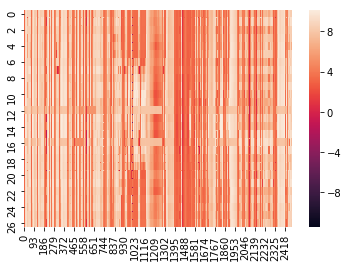

In [112]:
sns.heatmap(res)

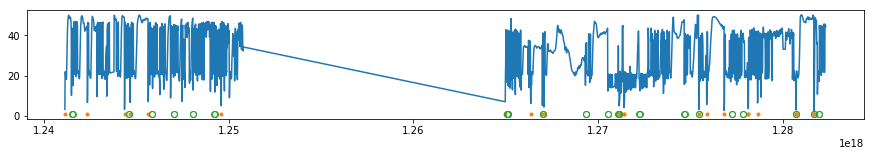

In [128]:
norm = pd.Series( np.linalg.norm(res, axis=0), index=dfr.index)
plt.figure(figsize=(15,2))
plt.plot(norm)

min_idx = np.argpartition(norm, ref.shape[0])[:ref.shape[0]]
plt.plot((norm/norm).iloc[min_idx], '.')
plt.plot(window_target[window_target==1], 'o', markerfacecolor='none')


In [159]:
from sklearn.linear_model import SGDClassifier

resX = pd.DataFrame(index=dfr.index, data=res.T)
resX.shape
clf = SGDClassifier(class_weight='balanced')
clf_old = SGDClassifier(class_weight='balanced')
clf.fit(resX.values[:2000], target.values[:2000])
clf_old.fit(dfr.values[:2000], target.values[:2000])

/home/tbsexton/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
       epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [160]:
clf.score(resX.values[2000:], target[2000:]), clf_old.score(dfr.values[2000:], target[2000:])

(0.96280991735537191, 0.41735537190082644)

In [161]:
target[2000:].sum()

5.0